# Assignment 7
Linda Koine, Jens Weimann, Markus Wiktorin

## 1

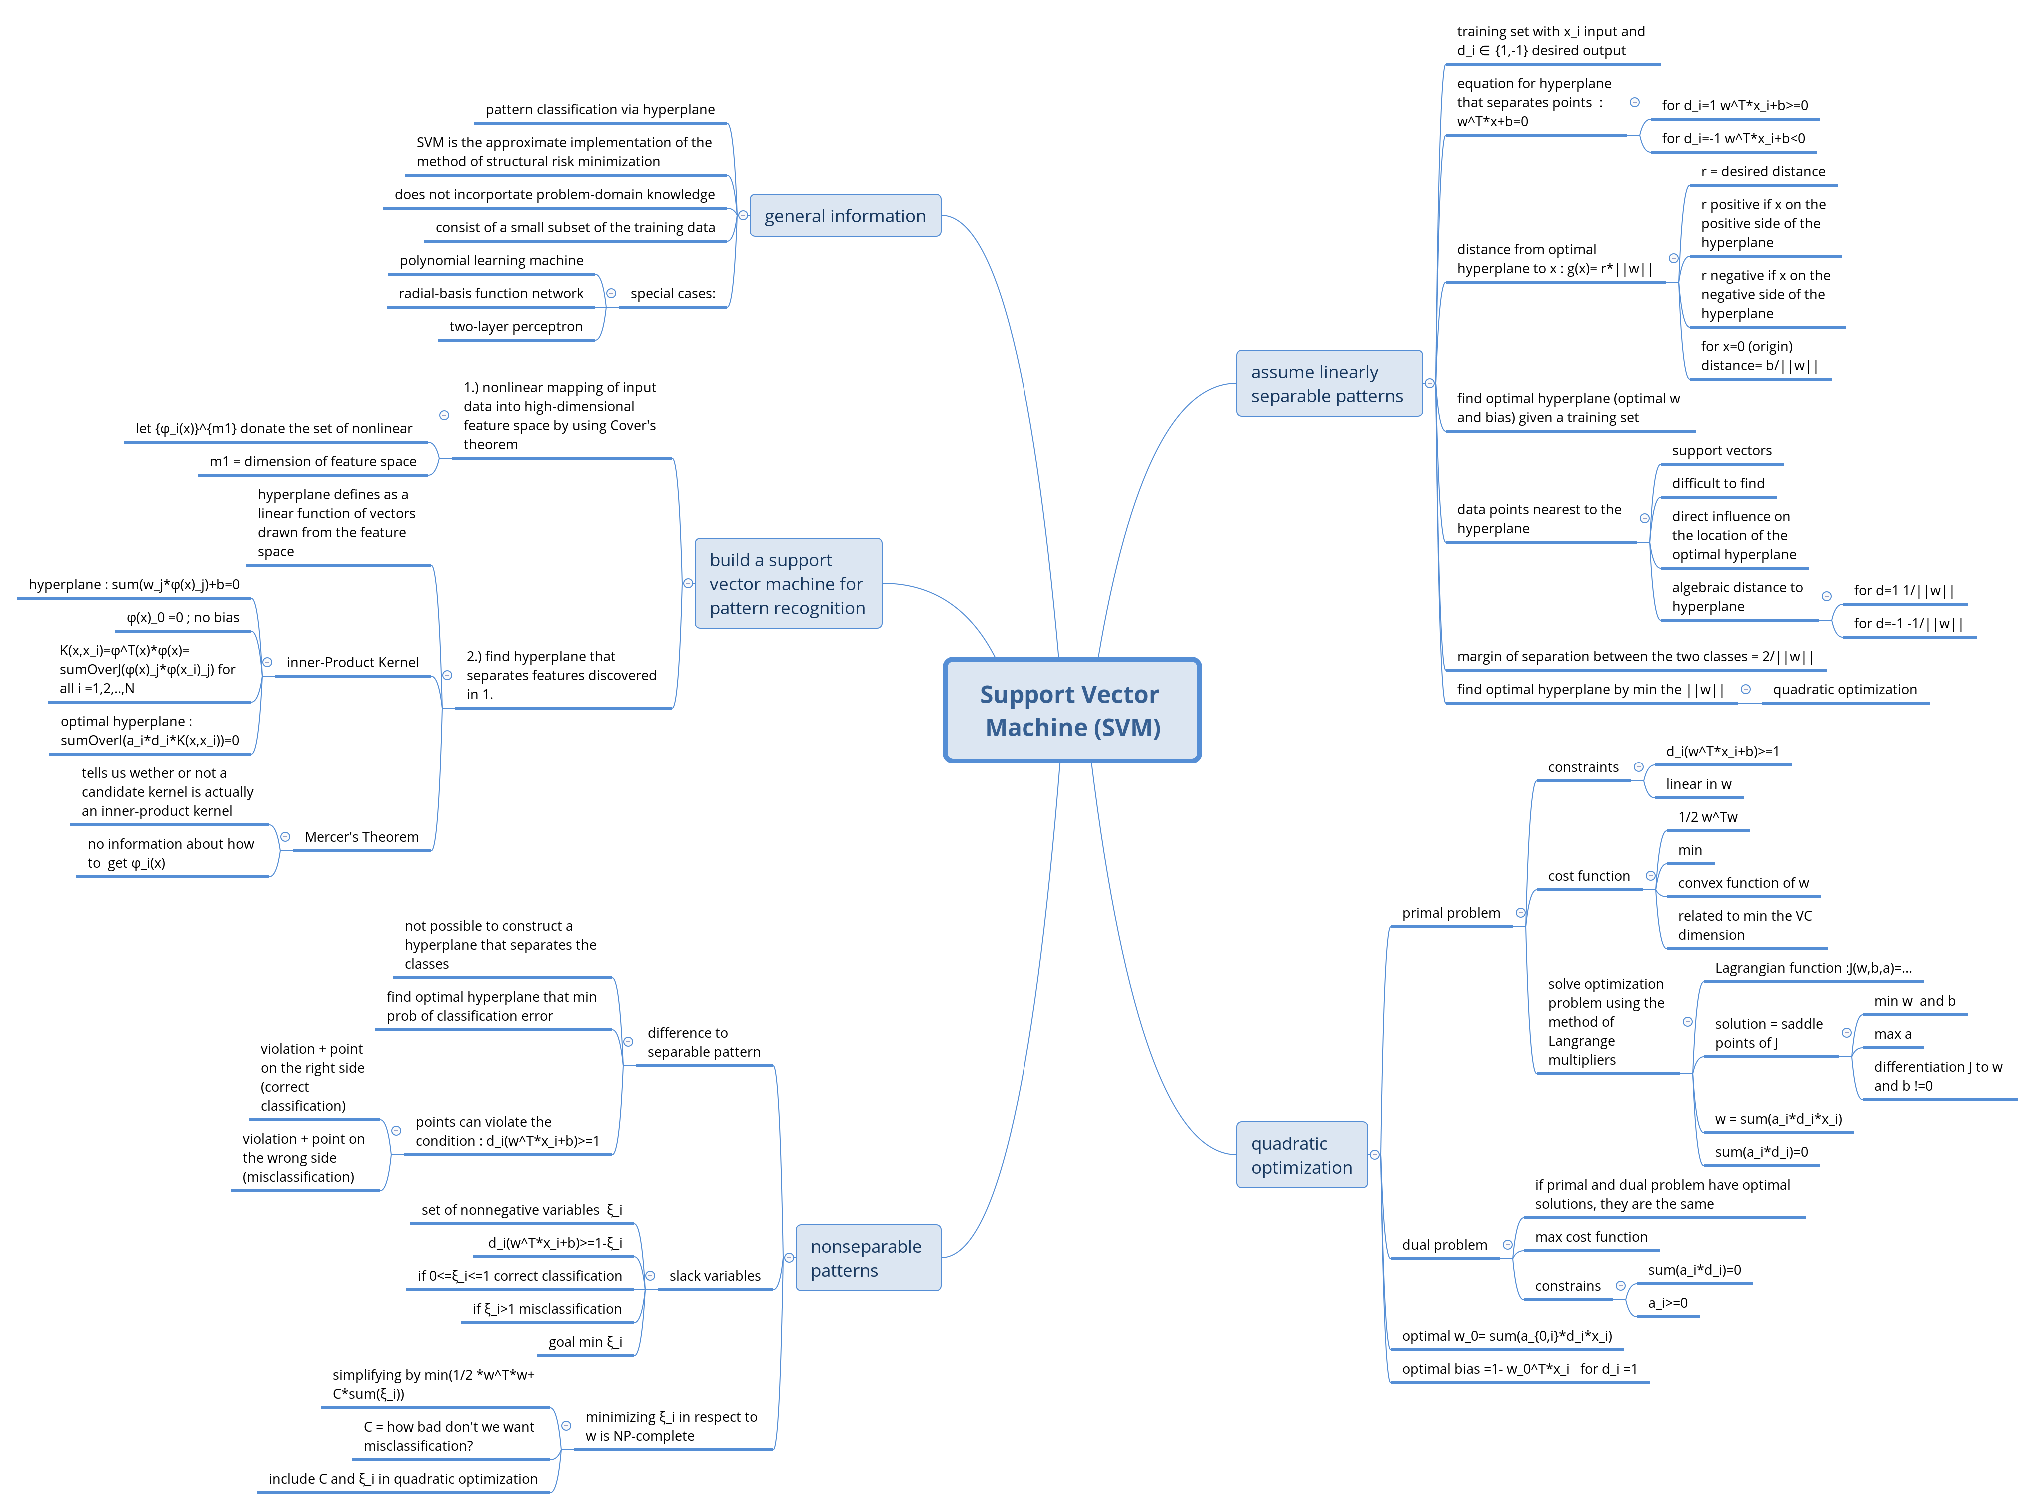

In [4]:
from IPython.display import Image
Image("SVM.png")

## 2

### What is the lowest order polynomial decison function ?
  
  a) $f(x) = ax^{2} + bx + c$  
  b) $f(x) = ax^{3} +bx^{2} +cx +d$  
  c) $f(x) = ax +b$
  
### What are the numbers of hidden neurons for a SVM with Gaussian basis function
The number of hidden neurons is determined by the number of support vectors.
  
  a) 3 hidden neurons  
  b) 4 hidden neurons  
  c) 2 hidden neurons  

## 3

In [5]:
import numpy as np
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class MoonPair:
    def __init__(self, r, w, d, noise_probability=0):
        self.r = r
        self.w = w
        self.d = d
        self.noise_probability = noise_probability
        
    def get_region_a_point(self, sure=False):
        if not sure and np.random.rand() < self.noise_probability:
            return self.get_region_b_point(True)
        while True:
            point = np.array([np.random.rand() * (self.r + self.w/2) * 2 - (self.r + self.w/2),
                              np.random.rand() * (self.r + self.w/2)])
            norm = np.linalg.norm(point)
            if norm < self.r + self.w/2 and norm > self.r - self.w/2:
                return point
            
    def get_region_b_point(self, sure=False):
        if not sure and np.random.rand() < self.noise_probability:
            return self.get_region_a_point(True)
        while True:
            point = np.array([np.random.rand() * (self.r + self.w/2) * 2 - self.w/2,
                              -np.random.rand() * (self.r + self.w/2) - self.d])
            norm = np.linalg.norm(point - np.array([self.r, -self.d]))
            if norm < self.r + self.w/2 and norm > self.r - self.w/2:
                return point
            
    def print_pair(self):
        points_a = []
        points_b = []
        for i in range(1000):
            points_a.append(self.get_region_a_point())
            points_b.append(self.get_region_b_point())

        points_a = np.array(points_a)
        points_b = np.array(points_b)
        plt.figure()
        plt.axis('equal')
        plt.title("r = " + str(self.r) + ", w = " + str(self.w) + \
                  ", d = " + str(self.d) + ", noise = " + str(self.noise_probability))
        plt.scatter(points_a[:,0], points_a[:,1])
        plt.scatter(points_b[:,0], points_b[:,1])
        plt.legend(["A", "B"])
        plt.show()
        
    def generate_sample_set(self, size, sure=False):
        sample = []
        for i in range(round(size / 2)):
            sample.append(np.hstack((self.get_region_a_point(sure), 'A')))
            sample.append(np.hstack((self.get_region_b_point(sure), 'B')))
        return np.array(sample)
    
    def try_svm(self, machine, train_size, test_size, plot_errors=False):
        train_set = self.generate_sample_set(train_size)
        input = np.array(train_set[:,0:2], dtype=float)
        output = train_set[:,2]
        machine.fit(input, output)
        
        test_set = self.generate_sample_set(test_size, sure=True)
        test_input = np.array(test_set[:,0:2], dtype=float)
        prediction = machine.predict(test_input)
        x = 0
        error = 0
        error_colors = []
        for i in prediction:
            if i != test_set[x, 2]:
                error = error + 1
                error_colors.append("r")
            else:
                error_colors.append("g")
            x = x + 1
        error = error / test_size
        plt.axis('equal')
        plt.title("Result of SVM classification (error = " + \
                  str(np.round(error, 2)) + ")\n" + "Kernel: " + machine.kernel + "\nr = " + \
                  str(self.r) + ", w = " + str(self.w) + ", d = " + str(self.d)) 
        if plot_errors:
            plt.scatter(test_input[np.where(prediction == test_set[:,2])][:,0], \
                        test_input[np.where(prediction == test_set[:,2])][:,1], c="g")
            plt.scatter(test_input[np.where(prediction != test_set[:,2])][:,0], \
                        test_input[np.where(prediction != test_set[:,2])][:,1], c="r")
            plt.legend(["classified correctly", "classified wrongly"])
        else:
            plt.scatter(test_input[np.where(prediction == 'A')][:,0], \
                        test_input[np.where(prediction == 'A')][:,1])
            plt.scatter(test_input[np.where(prediction == 'B')][:,0], \
                        test_input[np.where(prediction == 'B')][:,1])

        plt.legend(["classified as A", "classified as B"])
        plt.show()
        return error

In [7]:
# Disable jupyter notebook scrolling

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

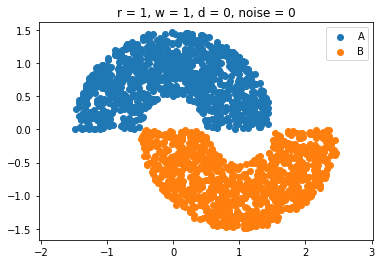

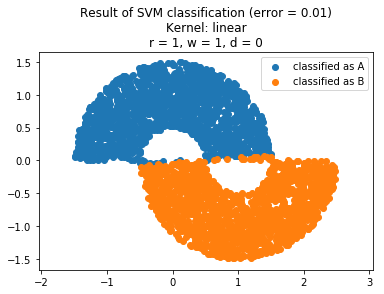

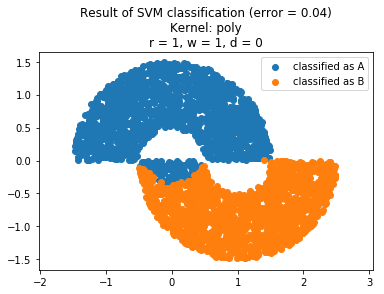

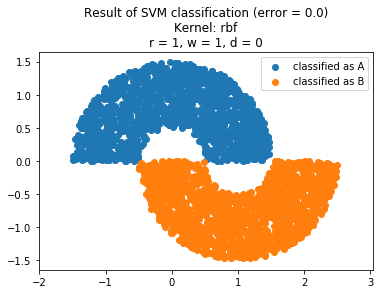

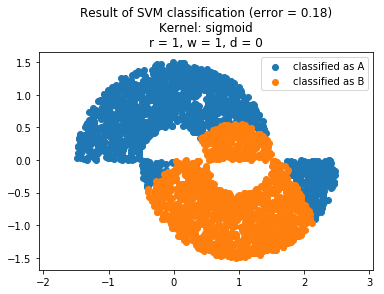

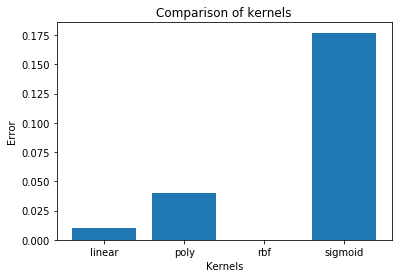

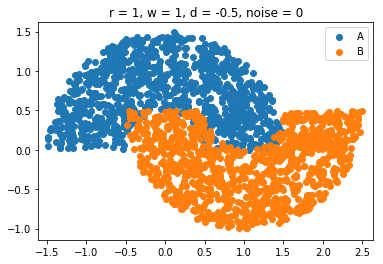

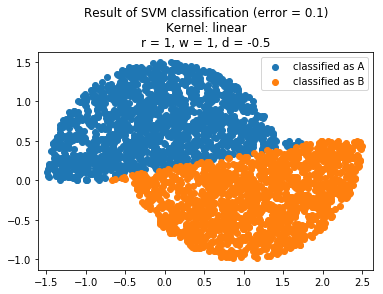

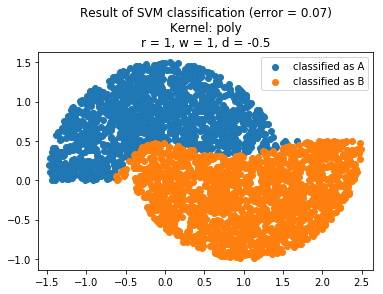

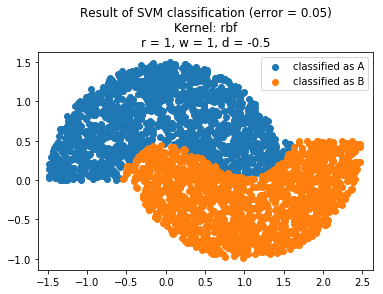

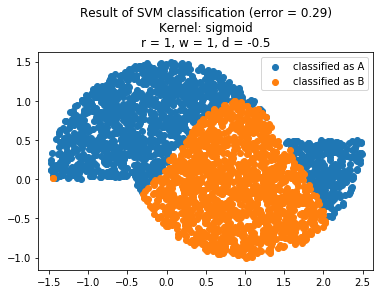

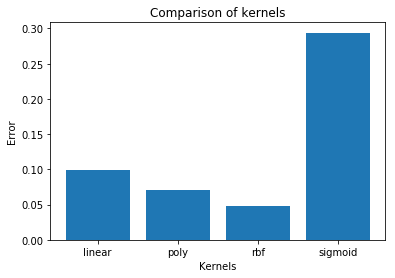

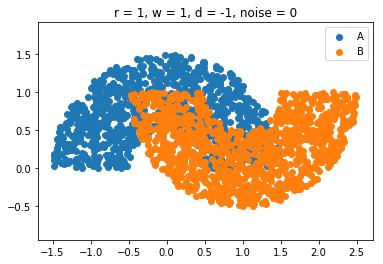

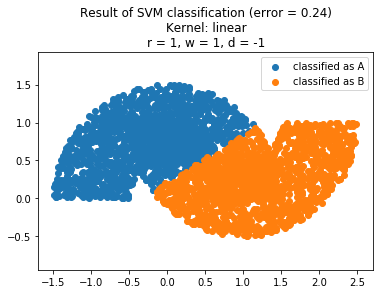

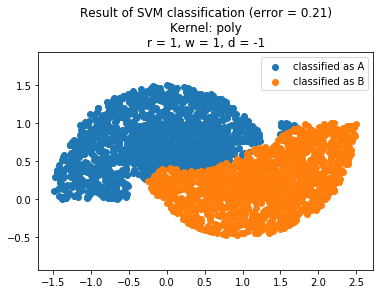

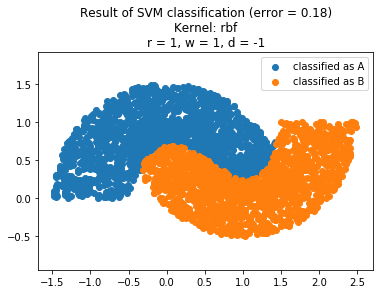

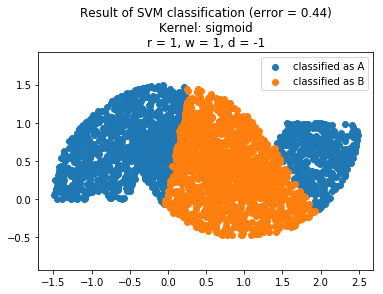

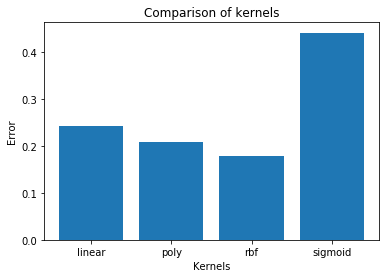

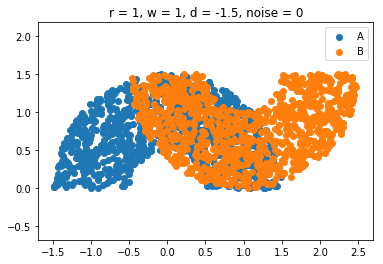

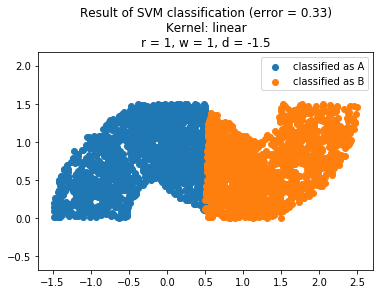

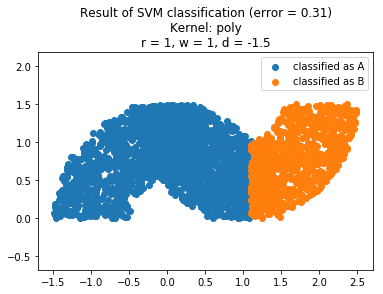

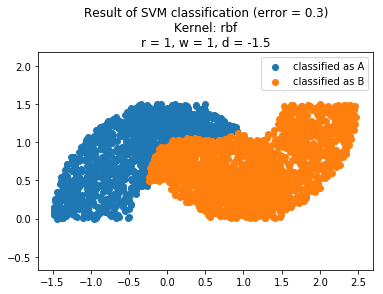

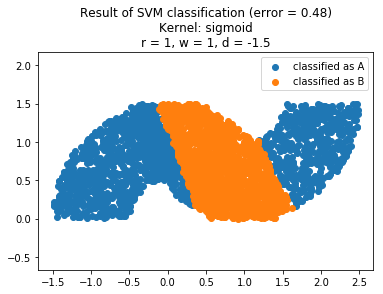

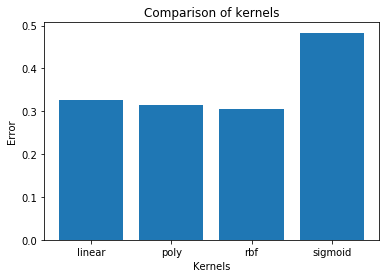

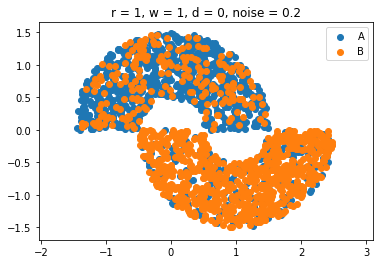

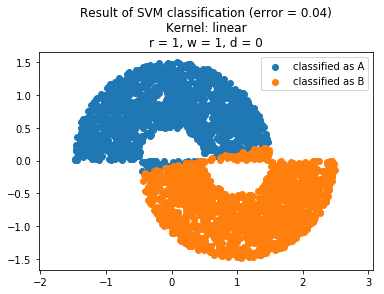

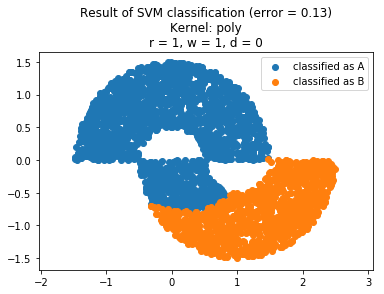

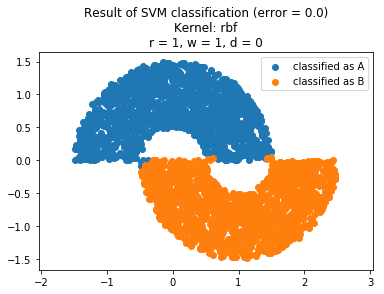

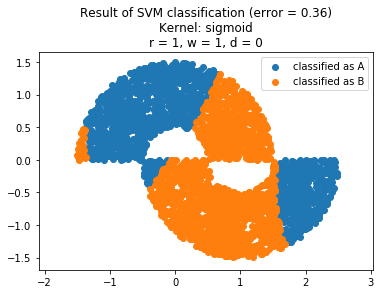

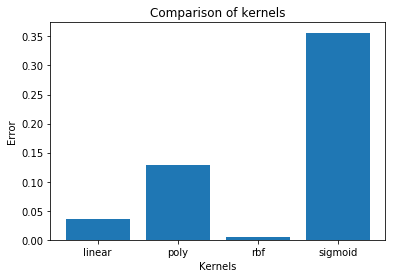

In [14]:
train_size = 1000
test_size = 3000

cases = []
cases.append(MoonPair(1, 1, 0))
cases.append(MoonPair(1, 1, -1/2))
cases.append(MoonPair(1, 1, -1))
cases.append(MoonPair(1, 1, -3/2))
cases.append(MoonPair(1, 1, 0, noise_probability=0.2))

kernels = ["linear", "poly", "rbf", "sigmoid"]

for case in cases:
    case.print_pair()
    errors = []
    for kernel_ in kernels:
        errors.append(case.try_svm(svm.SVC(kernel=kernel_), \
                train_size, test_size))

    plt.figure()
    plt.bar(range(len(errors)), errors)
    plt.xticks(range(len(errors)), kernels)
    plt.xlabel("Kernels")
    plt.ylabel("Error")
    plt.title("Comparison of kernels")
    plt.show()

In the provious plots we can see that the radial basis kernel works very well for all tasks.
Even strong noise lets the SVM work pretty good.
The sigmoid kernel performs worst in all cases.